# Level 2 Task 3: Unsupervised Learning with K-means
## 1.1)Introduction

Unsupervised learning is a type of machine learning that identifies hidden patterns or intrinsic structures within unlabeled data. Among its various algorithms, K-Means clustering is one of the most popular due to its simplicity, efficiency, and effectiveness in partitioning data into distinct groups.

In this project, K-Means is applied to explore and segment data through clustering, providing insights into natural groupings based on the underlying characteristics of the dataset.

## 1.2)Problem Statement

In many real-world datasets, especially those without predefined categories or labels, it is challenging to understand the structure or relationships within the data. Without labels, traditional supervised learning methods become inapplicable. This creates a need for techniques that can automatically identify groups or clusters with similar properties.

## 1.3)Objective

The main objective of this project is to apply K-Means clustering to uncover hidden patterns and groupings within the dataset. Specifically, the goals are:

* To clean and preprocess the dataset by removing irrelevant or null columns and preparing features for modeling.

* To implement and optimize the K-Means clustering algorithm by determining an appropriate number of clusters using evaluation techniques such as the elbow method or silhouette score.


## 2)Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3)Loading the dataset

In [2]:
df = pd.read_csv('/content/Live.csv')

## 4)Checking the data



In [3]:
# getting the shape of the dataset
print(f"The number of rows are {df.shape[0]} and the number of columns are {df.shape[1]}")

The number of rows are 7050 and the number of columns are 16


In [4]:
# preview the first 5 rows of the dataset
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
# previewing the last 5 rows of the dataset
df.tail()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN
7049,1050855161656896_1050858841656528,photo,9/10/2016 10:30,17,0,0,17,0,0,0,0,0,NaN,NaN,NaN,NaN


In [6]:
# checking for the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

there are 13 columns that are numerical and 3 that are categorical

In [7]:
# viewing the statistial summary of the dataset
df.describe(include="all")

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050,7050,7050,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
unique,6997,4,6913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,819700534875473_962061653972693,photo,3/20/2018 1:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,4288,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN


## 5)Data Cleaning

In [8]:
# checking for missing values
df.isnull().sum()

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


we notice that Column1, Column2, Column3, and Column4 are completely null. So, we will have to remove them

In [9]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis =1, inplace=True)

In [10]:
# viewing the columns to see if the mentioned columns above are dropped
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

we can see and are now satissfied that the mentioned columns above have been dropped.

In [11]:
# checking for duplicated rows
df.duplicated().sum()

np.int64(51)

there are 51 duplicated  rows. we will have to remove them.

In [12]:
# removing the duplicated rows
df.drop_duplicates(inplace=True)

In [13]:
# droppping status id because it will not help in our data modelling
df.drop('status_id', axis=1, inplace=True)

## 6)Feature engineering

In [14]:
# label encoding the features: status type
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['status_type'] = le.fit_transform(df['status_type'])


In [15]:
# dropping the status_published feature because its conversion to datetime has is not accurate
df.drop('status_published', axis=1, inplace=True)

In [16]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


## 7/Data Modelling
we will begin with selecting the feature vectors and label features

### 7.1)Feature vectors and label features

In [17]:
X = df
y = df['status_type']

### 7.2)Feature Scaling


In [18]:
cols = df.columns
cols

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [20]:
X = pd.DataFrame(X, columns=[cols])
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


### 7.3)using the elbow method to fing the optimal number of clusters

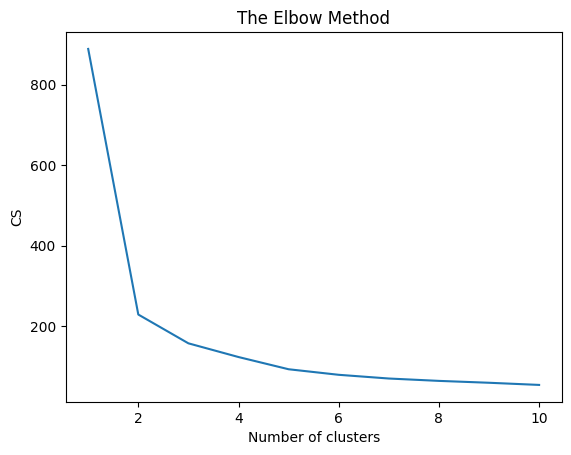

In [21]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [22]:
# we are going to use 2 clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [23]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 63 out of 6999 samples were correctly labeled.
Accuracy score: 0.01


the unsupervised classification model shows a weak classification accuracy of 1%. W e are going to use different number of clusters and see the result.

In [24]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 142 out of 6999 samples were correctly labeled.
Accuracy score: 0.02


for 3 clusters, the accuracy score is 2%

In [25]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 99 out of 6999 samples were correctly labeled.
Accuracy score: 0.01


for 4 clusters, the accuracy score is 1%

## 8)Conclusion
we conclude that the models are weak, with 3 clusters having 2%, which is the optimal model in this scenario.



In [25]:
s